## Import Required Library

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, 
import matplotlib.pyplot as plt  # for plotting facilities
import seaborn as sns; 
sns.set(color_codes=True)
from sklearn import preprocessing
from sklearn.decomposition import PCA 
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import RFECV
from sklearn.model_selection import train_test_split

lr, knn = LinearRegression(), KNeighborsClassifier()
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE

from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

from sklearn.cluster import KMeans
# from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings("ignore")

## Load Data

In [2]:
df_wholesale = pd.read_excel("/Users/sandaraung/Documents/Wholesale_Data/Wholesale_customers_data.xlsx")

In [3]:
df_wholesale.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
df_wholesale.shape

(440, 8)

In [5]:
df_wholesale.dtypes

Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

In [6]:
df_wholesale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


We can see that no null value and all the data are numeric data.

## Summary of Statistic dataset

In [7]:
df_wholesale.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


## Checking missing value

In [8]:
df_wholesale.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

We can see that there are no missing values in the dataset. Therefore, we do not need to use the dropna() function.

There are 6 continuous types of feature ('Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen')and 2 categoricals features ('Channel', 'Region')


In [9]:
categorical_features = ['Channel', 'Region']
continuous_features = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

In [10]:
df_wholesale['Channel'].value_counts()

1    298
2    142
Name: Channel, dtype: int64

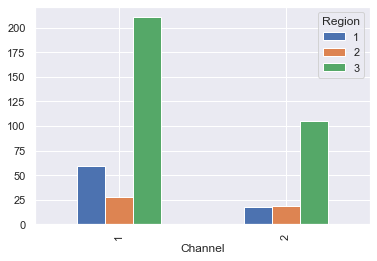

Region    1   2    3
Channel             
1        59  28  211
2        18  19  105


In [11]:
def categorical_multi(i,j):
    pd.crosstab(df_wholesale[i],df_wholesale[j]).plot(kind='bar')
    plt.show()
    print(pd.crosstab(df_wholesale[i],df_wholesale[j]))

categorical_multi(i='Channel',j='Region')   

In [12]:
df_wholesale.corr()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,1.000000,0.062028,-0.169172,0.460720,0.608792,-0.202046,0.636026,0.056011
Region,0.062028,1.000000,0.055287,0.032288,0.007696,-0.021044,-0.001483,0.045212
Fresh,-0.169172,0.055287,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.460720,0.032288,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,0.608792,0.007696,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,-0.202046,-0.021044,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,0.636026,-0.001483,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicassen,0.056011,0.045212,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


<AxesSubplot:>

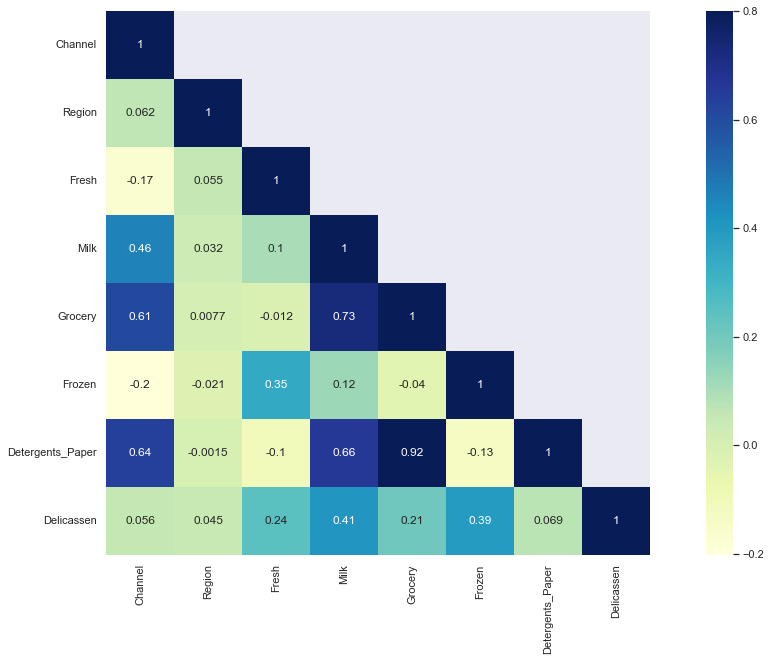

In [13]:
# Correlation analysis
corrMatt = df_wholesale.corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True, cmap='YlGnBu')

In [14]:
#to write review on above heatmat

## Checking outlier

<AxesSubplot:>

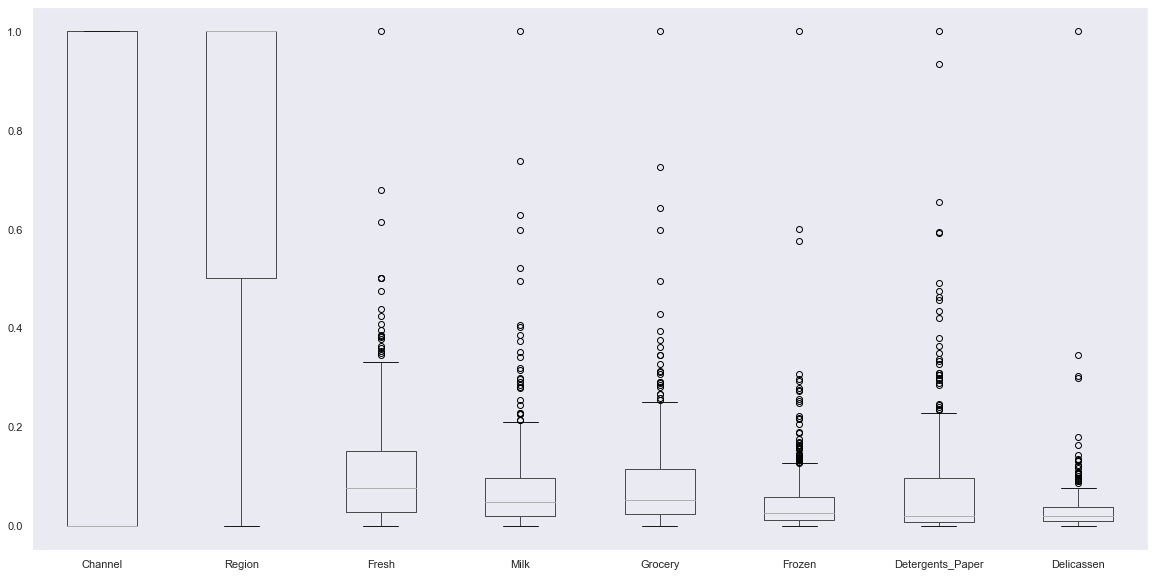

In [15]:
scaler = preprocessing.MinMaxScaler()
scaled = scaler.fit_transform(df_wholesale)
scaled_data = pd.DataFrame(scaled, columns = [name for name in list(df_wholesale)])
fig = plt.figure(figsize = (20,10))
scaled_data.boxplot(column=[name for name in list(scaled_data)], grid=False)

There is no outlier in this dataset.

Implement Feature Scaling to Normalize the data(compare the histogram/KDE for MinMaxScaler and StandardScaler). Choose one of the Scaler to proceed ahead and provide reasoning as to why it was selected?

I will test Standard Scaler Method and MinMaxScaler method. However I will apply only one most suitable method.

## Standard Scaler Method

In [17]:
df1 = df_wholesale.copy()

In [18]:
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler().fit_transform(df1)

scaled_frame = pd.DataFrame(std_scale, columns=df1.columns)

scaled_frame.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.448652,0.590668,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,1.448652,0.590668,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,1.448652,0.590668,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,-0.690297,0.590668,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,1.448652,0.590668,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347


In [19]:
scaled_frame.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02
mean,-2.452584e-16,-5.737834e-16,-2.422305e-17,-1.589638e-17,-6.030530e-17,1.135455e-17,-1.917658e-17,-8.276208e-17
std,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00
min,-6.902971e-01,-1.995342e+00,-9.496831e-01,-7.787951e-01,-8.373344e-01,-6.283430e-01,-6.044165e-01,-5.402644e-01
25%,-6.902971e-01,-7.023369e-01,-7.023339e-01,-5.783063e-01,-6.108364e-01,-4.804306e-01,-5.511349e-01,-3.964005e-01
50%,-6.902971e-01,5.906683e-01,-2.767602e-01,-2.942580e-01,-3.366684e-01,-3.188045e-01,-4.336004e-01,-1.985766e-01
75%,1.448652e+00,5.906683e-01,3.905226e-01,1.890921e-01,2.849105e-01,9.946441e-02,2.184822e-01,1.048598e-01
max,1.448652e+00,5.906683e-01,7.927738e+00,9.183650e+00,8.936528e+00,1.191900e+01,7.967672e+00,1.647845e+01


<AxesSubplot:ylabel='Density'>

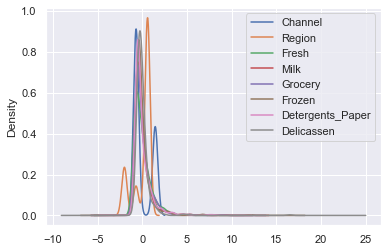

In [20]:
pd.DataFrame(scaled_frame).plot(kind='kde')

<AxesSubplot:ylabel='Frequency'>

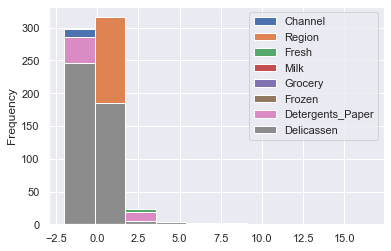

In [21]:
pd.DataFrame(scaled_frame).plot(kind='hist', bins=10)

The StandardScaler method is standardized the data uniformly across all columns. As observed in the table above, all feature values are now transformed to a consistent scale, and more accurate predictions by the model. ???? Kernel Density Estimation (KDE) appears superior to histograms because histograms tend to overlap data, making it difficult to discern individual field values, whereas KDE provides a more refined visualization of the data.

## MinMax Scaler Method

In [22]:
from sklearn.preprocessing import MinMaxScaler
minmax_scale = MinMaxScaler().fit_transform(df_wholesale)
scaled_frame2 = pd.DataFrame(minmax_scale,columns=df_wholesale.columns)
scaled_frame2.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.0,1.0,0.112940,0.130727,0.081464,0.003106,0.065427,0.027847
1,1.0,1.0,0.062899,0.132824,0.103097,0.028548,0.080590,0.036984
2,1.0,1.0,0.056622,0.119181,0.082790,0.039116,0.086052,0.163559
3,0.0,1.0,0.118254,0.015536,0.045464,0.104842,0.012346,0.037234
4,1.0,1.0,0.201626,0.072914,0.077552,0.063934,0.043455,0.108093


In [23]:
scaled_frame2.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,0.322727,0.771591,0.106977,0.078173,0.085671,0.050078,0.070510,0.031745
std,0.468052,0.387136,0.112774,0.100491,0.102430,0.079789,0.116790,0.058826
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.500000,0.027863,0.020124,0.023174,0.011788,0.006216,0.008453
50%,0.000000,1.000000,0.075802,0.048636,0.051225,0.024670,0.019927,0.020077
75%,1.000000,1.000000,0.150968,0.097154,0.114821,0.058005,0.095997,0.037907
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:ylabel='Density'>

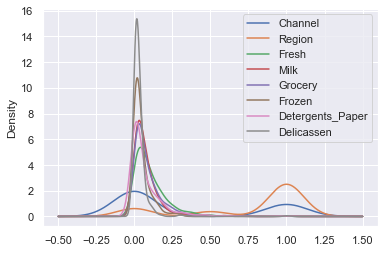

In [24]:
pd.DataFrame(scaled_frame2).plot(kind='kde')

<AxesSubplot:ylabel='Frequency'>

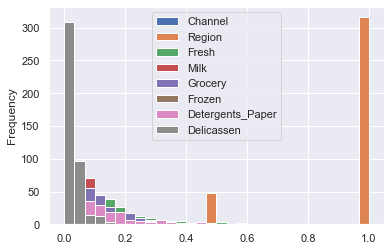

In [25]:
pd.DataFrame(scaled_frame2).plot(kind='hist', bins=30)

We applied the MinMaxScaler method to standardize the data uniformly across all columns. As shown in the previous table, all feature values have been transformed into a uniform range on the scale of [0,1]


In StandardScaler, it assumes that the data features are normally distributed and scales them to have a mean of zero and a standard deviation of one. This scaler ensures all features are on the same scale.

On the other hand, MinMaxScaler scales the data to a range typically between -1 and 1, especially accommodating negative values, and performs well when the standard deviation is small or the distribution is non-Gaussian. However, MinMaxScaler is sensitive to outliers, which can affect its performance.

StandardScaler provides centered distributions without outliers, whereas MinMaxScaler may retain outliers in the scaled data.

Given these considerations, we will proceed with StandardScaler for our analysis


In [26]:
df_Con=df_wholesale.drop(['Channel','Region'], axis=1)  # drop Categorical features

In [27]:
df_Con.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


array([[<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>]], dtype=object)

<Figure size 720x576 with 0 Axes>

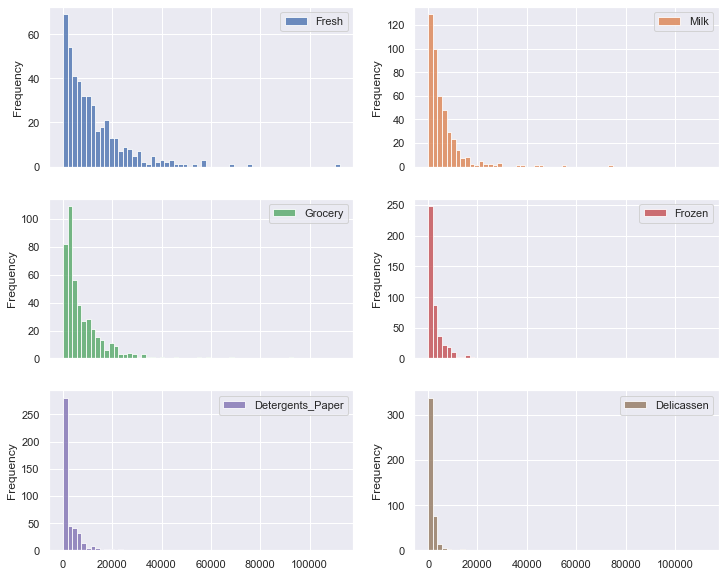

In [28]:
# Histogram
plt.figure(figsize=(10,8))
df_Con.plot(kind='hist', alpha=0.8,bins=60, subplots=True,layout=(3,2),legend=True,figsize=(12,10))

The histograms illustrate a significant drop in the frequency of orders for these specific products, suggesting that this cluster likely represents larger companies making higher-volume purchases of these items

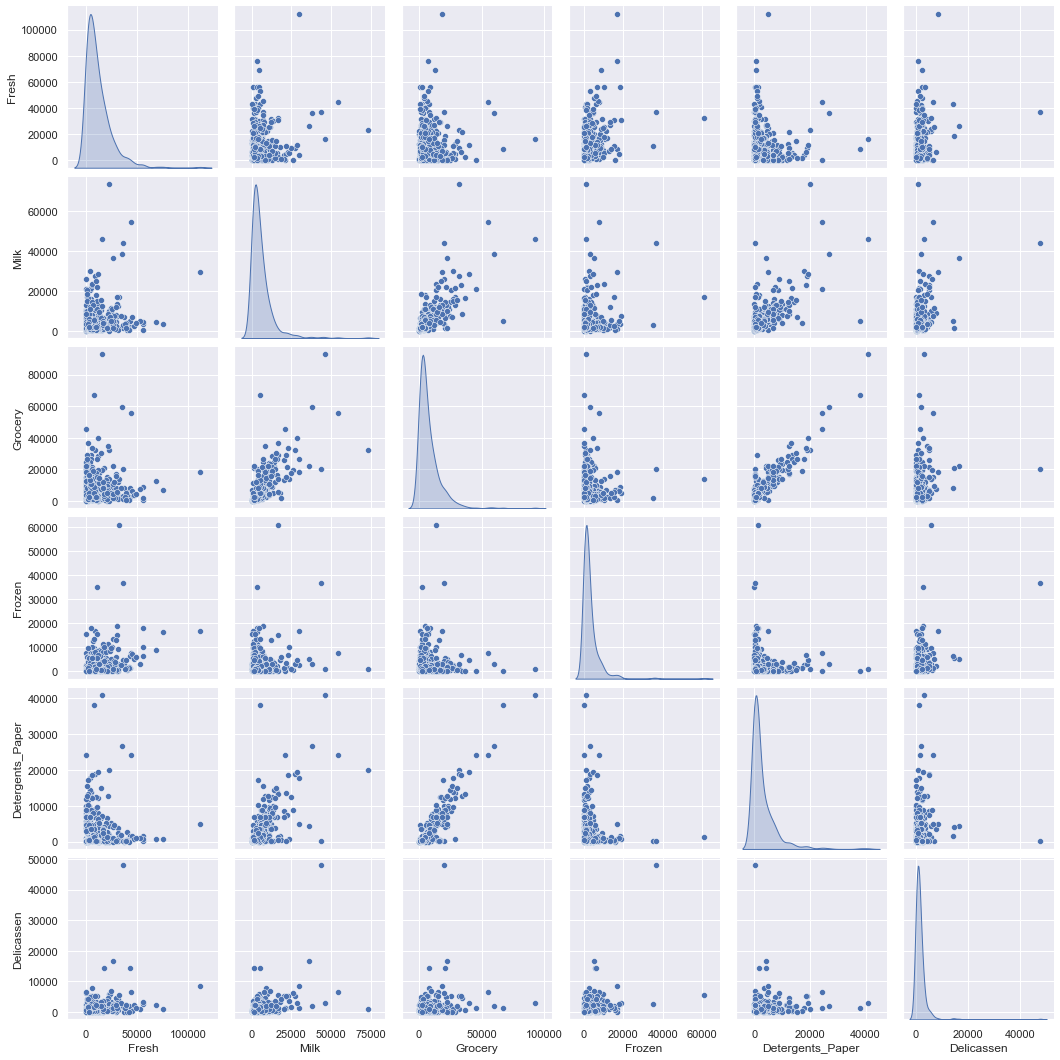

In [29]:
plot1=sns.pairplot(df_Con, diag_kind='kde')

In [30]:
mean_df=df_wholesale.describe().loc['mean',:]
mean_df

Channel                 1.322727
Region                  2.543182
Fresh               12000.297727
Milk                 5796.265909
Grocery              7951.277273
Frozen               3071.931818
Detergents_Paper     2881.493182
Delicassen           1524.870455
Name: mean, dtype: float64

Q. Find optimal number of features using RFECV and show the plot between Number of features selected vs Cross validation score (use channel as target variable)

In [31]:
X = scaled_frame.drop(['Channel'], axis=1)
y = df_wholesale['Channel'] # Channel has 2 values so we will use channel here from main table

# convert channel into binary values
y[y == 2] = 0
y[y == 1] = 1

y.head()

0    0
1    0
2    0
3    1
4    0
Name: Channel, dtype: int64

In [32]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=1)

In [33]:
print("Fit raw features:")
print(" LR:", lr.fit(X_train, y_train).score(X_test, y_test))
print("KNN:", knn.fit(X_train, y_train).score(X_test, y_test))
print("GBC: ", GradientBoostingClassifier().fit(X_train, y_train).score(X_test, y_test))
print("RFC: ", RandomForestClassifier().fit(X_train, y_train).score(X_test, y_test))

Fit raw features:
 LR: 0.2612412368111017
KNN: 0.9
GBC:  0.9090909090909091
RFC:  0.8909090909090909


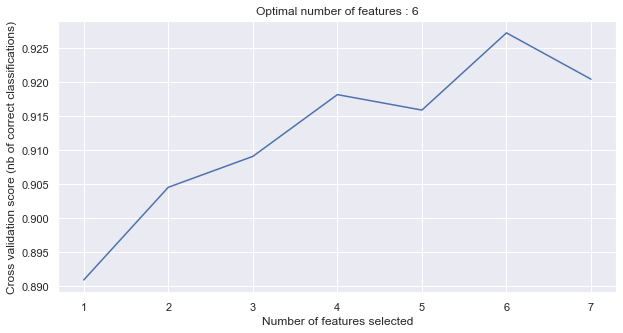

In [34]:
rf = RandomForestClassifier(max_depth=7, random_state=1)
rfecv = RFECV(estimator=rf)
rfecv.fit(X, y)

# Plot number of features VS. cross-validation scores
plt.figure(figsize=(10,5))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.cv_results_["mean_test_score"]) + 1),rfecv.cv_results_["mean_test_score"])
plt.title("Optimal number of features : %d" % rfecv.n_features_)
plt.show()

In [35]:
rfecv.cv_results_["mean_test_score"]

array([0.89090909, 0.90454545, 0.90909091, 0.91818182, 0.91590909,
       0.92727273, 0.92045455])

 we will use RFECV using GradientBoostingClassifier with pipleline

In [36]:
model = GradientBoostingClassifier()
rfecv = RFECV(estimator=GradientBoostingClassifier())

Feature selection is a critical task, especially for datasets with numerous features. Identifying the optimal number of features enhances model accuracy. Essential features and their optimal count can be determined using methods like feature importance or feature ranking.

Rather than manually specifying the number of features (RFE), automating their selection would be advantageous. This can be achieved using recursive feature elimination with cross-validation (RFECV).

### Pipeline
We will use a pipeline for cross-validation to prevent data leakage. RepeatedStratifiedKFold will be employed for repeated stratified cross-validation. We'll evaluate the score using cross_val_score. Our chosen estimator is GradientBoostingClassifier. We'll also utilize numpy to compute the mean of the scores

In [37]:
pipeline = Pipeline([('Feature Selection', rfecv), ('Model', model)])
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=42)
n_scores = cross_val_score(pipeline, X,y, scoring='accuracy', cv=cv, n_jobs = -1)
np.mean(n_scores)

0.9049999999999998

We will fit the pipeline to get the optimal number of features.

In [38]:
pipeline.fit(X,y)

Pipeline(steps=[('Feature Selection',
                 RFECV(estimator=GradientBoostingClassifier())),
                ('Model', GradientBoostingClassifier())])

In [39]:
print("Optimal number of features : %d" % rfecv.n_features_)

Optimal number of features : 5


In [40]:
rfecv.support_

array([False, False,  True,  True,  True,  True,  True])

When fitted, the following attributes can be obtained:

ranking_ — the ranking of the features.
n_features_ — the number of features that have been selected.
support_ — an array that indicates whether or not a feature was selected.
grid_scores_ — the scores obtained from cross-validation.

We put it into a dataframe and see the result

In [41]:
rfecv_df = pd.DataFrame(rfecv.ranking_, index=X.columns, columns = ['Rank']).sort_values(by='Rank', ascending=True)
rfecv_df.head(10)

,Rank
Milk,1
Grocery,1
Frozen,1
Detergents_Paper,1
Delicassen,1
Fresh,2
Region,3


### Cross-Validation Score

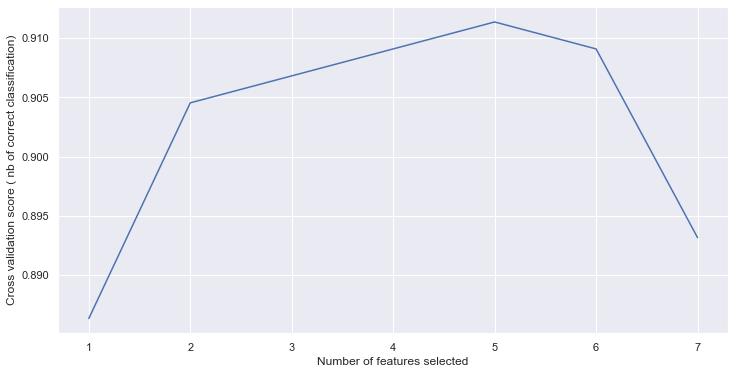

In [42]:
plt.figure(figsize=(12,6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score ( nb of correct classification)")
plt.plot(range(1, len(rfecv.cv_results_["mean_test_score"]) + 1), rfecv.cv_results_["mean_test_score"])
plt.show()

### We have determined that Milk, Grocery, Frozen, Detergents_Paper, and Delicassen are the best-performing features

Q. Implement KMeans Clustering for K=2 to K=15 and based on elbow method identify what is the optimum number of clusters

In [43]:
# First we need to convert our categorical features (region and channel) to dummy variable:
# df2 = pd.get_dummies(df)
# X1 = df2.iloc[:,:].values

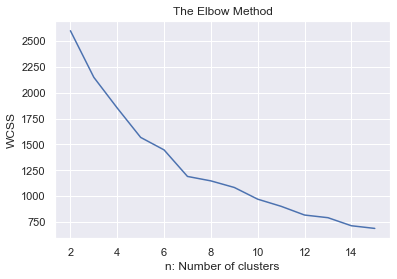

In [44]:
wcss = []
for i in range(2, 16):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(scaled_frame) # Standard scaler 
    wcss.append(kmeans.inertia_)
    cluster_labels = kmeans.labels_
    # silhouette score
#     silhouette_avg = silhouette_score(df, cluster_labels)
#     print("For n_clusters={0}, the silhouette score is {1}".format(i, silhouette_avg))
plt.plot(range(2, 16), wcss)
plt.title('The Elbow Method')
plt.xlabel('n: Number of clusters')
plt.ylabel('WCSS')
plt.show()

This graph exhibits an elbow shape, and our goal is to identify this elbow point. In this case, the elbow point occurs around 6, which represents the optimal number of clusters for the given data. Upon closer examination, we observe that beyond 6 clusters, the within-cluster sum of squares (WCSS) decreases slightly

In [45]:
kmeans = KMeans(n_clusters = 6,random_state = 111)
y_means = kmeans.fit(scaled_frame)

In [46]:
y_means

KMeans(n_clusters=6, random_state=111)

In [47]:
print('SSE: ', kmeans.inertia_)
print('\nCentroids: \n', kmeans.cluster_centers_)

SSE:  1348.2786511995862

Centroids: 
 [[-5.89640676e-01 -1.59983464e+00 -1.35173422e-01 -3.49597890e-01
  -4.07886727e-01  1.35713085e-02 -4.21519366e-01 -1.58041886e-01]
 [-6.90297086e-01  5.90668285e-01 -2.87768508e-01 -3.86505731e-01
  -4.73672753e-01 -1.94115874e-01 -4.38556655e-01 -1.92266737e-01]
 [ 1.44865163e+00 -5.58343155e-02  3.13830315e-01  3.92190593e+00
   4.27561037e+00 -3.57419457e-03  4.61816580e+00  5.03365339e-01]
 [-1.55559907e-01  2.67416985e-01  3.16804122e+00  3.51326433e+00
   1.11031138e+00  5.51716255e+00 -3.83193146e-02  6.43664422e+00]
 [ 1.44865163e+00  1.63142372e-01 -3.47307951e-01  4.28317250e-01
   6.66702394e-01 -3.55967591e-01  6.92257331e-01  5.10760509e-03]
 [-5.69224517e-01  3.46705040e-01  1.62149989e+00 -2.50579153e-01
  -3.30485714e-01  9.96009718e-01 -4.55016079e-01  2.55693053e-01]]


In [48]:
#count number of records in every cluster
pd.Series(kmeans.labels_).value_counts()

1    164
4    124
0     85
5     53
2     10
3      4
dtype: int64

Q. Implement PCA with number of original features to answer how much variance is explained by first 2 components and by first 4 components and visualize the clusters in the data



In [49]:
kmeans = KMeans(n_clusters=6, init='k-means++', max_iter=400, n_init=100, random_state=0)
y_means = kmeans.fit(scaled_frame)

In [50]:
pca2 = PCA(n_components=2).fit(scaled_frame)
pca2d = pca2.transform(scaled_frame)

print("Explained variance is:",pca2.explained_variance_)
print("Explained variance ratio",pca2.explained_variance_ratio_)
print("Variance for 1st component is 38.75% & 2nd component is 22.37%")

Explained variance is: [3.10707136 1.79404441]
Explained variance ratio [0.38750123 0.22374588]
Variance for 1st component is 38.75% & 2nd component is 22.37%


From the output above, we can see that Principal Component 1 captures 38.75% of the variance, whereas Principal Component 2 captures only 22.37%.

Explained variance is: [3.10707136 1.79404441 1.0140786  0.74007428]
Explained variance ratio is: [0.38750123 0.22374588 0.12647173 0.09229904]


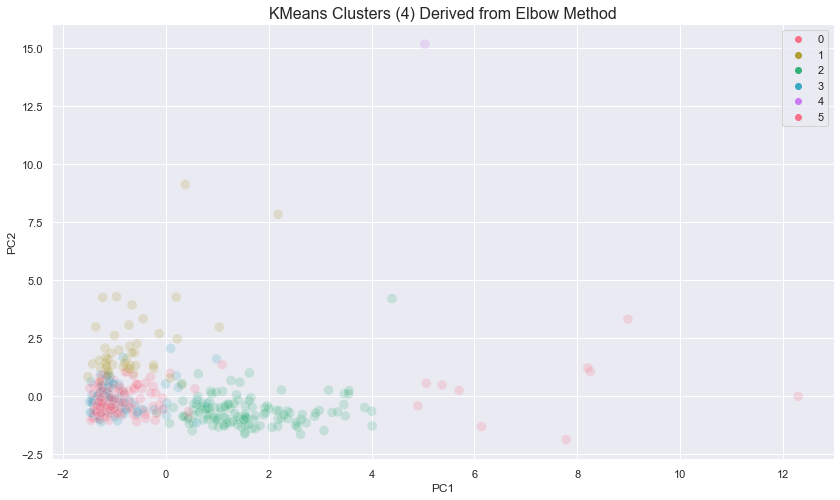

In [51]:
pca4 = PCA(n_components=4).fit(scaled_frame)
pca4d = pca4.transform(scaled_frame)

print("Explained variance is:",pca4.explained_variance_)
print("Explained variance ratio is:",pca4.explained_variance_ratio_)

plt.figure(figsize = (14,8))
sns.scatterplot(pca4d[:,0], pca4d[:,1], 
                hue=y_means.labels_, 
                palette='husl',
                s=100, alpha=0.2).set_title('KMeans Clusters (4) Derived from Elbow Method', fontsize=16,)
plt.legend()
plt.ylabel('PC2')
plt.xlabel('PC1')
plt.show()

According to the output above, Principal Component 1 captures 38.75% of the variance, Principal Component 2 captures 22.37%, Principal Component 3 captures 12%, and Principal Component 4 captures 9%

Q. Implement XGBoost Classifier with 5 Fold CV and report the performance metrics

In [52]:
X = df_wholesale.drop('Channel', axis=1)

y = df_wholesale['Channel']

In [53]:
X.head()

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,3,12669,9656,7561,214,2674,1338
1,3,7057,9810,9568,1762,3293,1776
2,3,6353,8808,7684,2405,3516,7844
3,3,13265,1196,4221,6404,507,1788
4,3,22615,5410,7198,3915,1777,5185


In [54]:
y.head()

0    0
1    0
2    0
3    1
4    0
Name: Channel, dtype: int64

 y-label contains values represented as 1 and 2. We will convert these to 0 and 1 for subsequent analysis

In [55]:
# convert labels into binary values

y[y == 2] = 0

y[y == 1] = 1

In [56]:
y.head()

0    0
1    0
2    0
3    1
4    0
Name: Channel, dtype: int64

We will transform the dataset into a streamlined data structure known as DMatrix, which is supported by XGBoost and known for delivering enhanced performance and efficiency.

## k-fold Cross Validation using XGBoost

In [57]:
model = XGBClassifier(eval_metric='mlogloss')
kfold = KFold(n_splits=5)

In [58]:
results = cross_val_score(model, X, y, cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))
Accuracy = results.mean()*100

Accuracy: 92.05% (3.37%)


In [59]:
# max_depth = 5, alpha = 10, n_estimators = 10)

model = XGBClassifier(eval_metric='mlogloss')
kfold = KFold(n_splits=5)

In [60]:
PW = cross_val_score(model, X, y, cv=kfold, scoring='precision_weighted')
Rscore = cross_val_score(model, X, y, cv=kfold, scoring='recall_weighted')

In [61]:
Recall = (round((Rscore.mean()*100),3))
Precision = (round((PW.mean()*100),3))

f1score=round(2*((Recall*Precision)/(Recall+Precision)),3)

In [62]:
print("Accuracy= %f, Recall=%f, Precision=%f, f1score=%f" % (Accuracy,Recall,Precision,f1score))

Accuracy= 92.045455, Recall=92.045000, Precision=92.725000, f1score=92.384000


In [63]:
pwd

'/Users/sandaraung'